In [2]:
import tensorflow as tf
import numpy as np

In [3]:
X = np.eye(8).astype(np.float32)
print(X)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
print("shape[0] is", X.shape[0])
print("shape[1] is", X.shape[1])

shape[0] is 8
shape[1] is 8


In [5]:
# make model layer 8-3-8
# 8-3 is encoder
# 3-8 is decoder

inputs = tf.keras.Input(shape = X.shape[1]) # 8
encoder = tf.keras.layers.Dense(3, activation = 'relu') # 3
decoder = tf.keras.layers.Dense(X.shape[1], activation = 'relu') # 8
outputs = decoder(encoder(inputs))

In [6]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
              loss=tf.keras.losses.MeanSquaredError())

In [7]:
model.fit(X, X, epochs=2000, verbose=0)

In [8]:
print(X)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
Z = np.round(model(X))
print(Z)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Z')

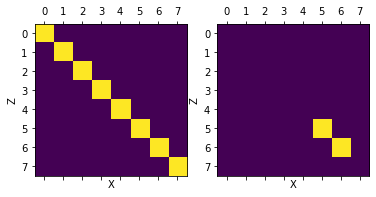

In [18]:
# plt.plot(X.ravel(), color='red')
# plt.plot(Z.ravel())

plt.subplot(1, 2, 1)
plt.matshow(X, fignum=0)
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1, 2, 2)
plt.matshow(Z, fignum=False)
plt.xlabel('X')
plt.ylabel('Z')


In [8]:
np.round(encoder(X))

array([[1., 1., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

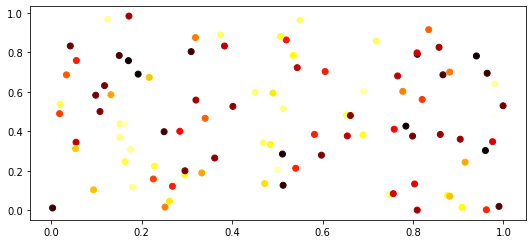

In [33]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Random data of 100×3 dimension
data = np.array(np.random.random((100, 3)))

# Scatter plot
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='hot')

# Display the plot
plt.show()